In [1]:
from google.colab import files
uploaded = files.upload()

Saving cancer.csv to cancer.csv


In [2]:
# import required libraries
import pandas as pd

In [3]:
# Read the data from the CSV file
df = pd.read_csv('cancer.csv')

In [4]:
# Display the first few rows of the dataset
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [5]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
# Generate descriptive statistics for the dataset
...

In [7]:
# Visualize box plots for each numerical feature

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


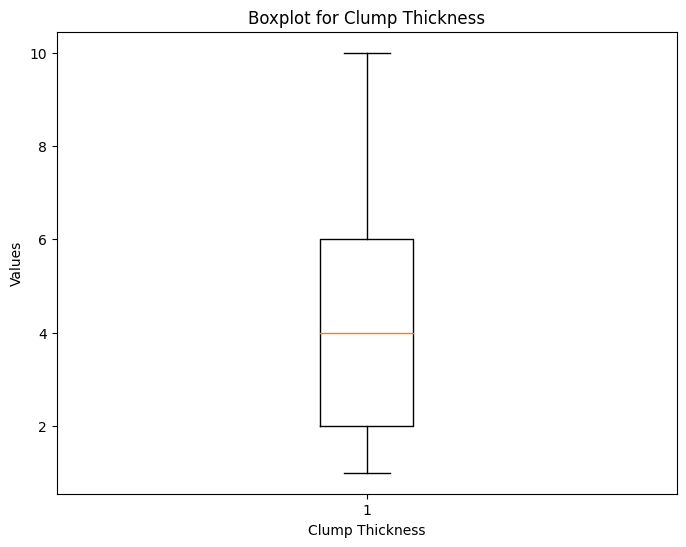

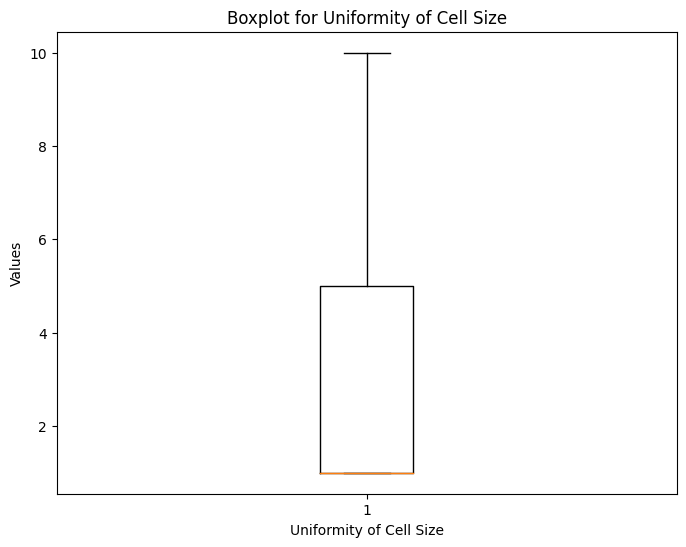

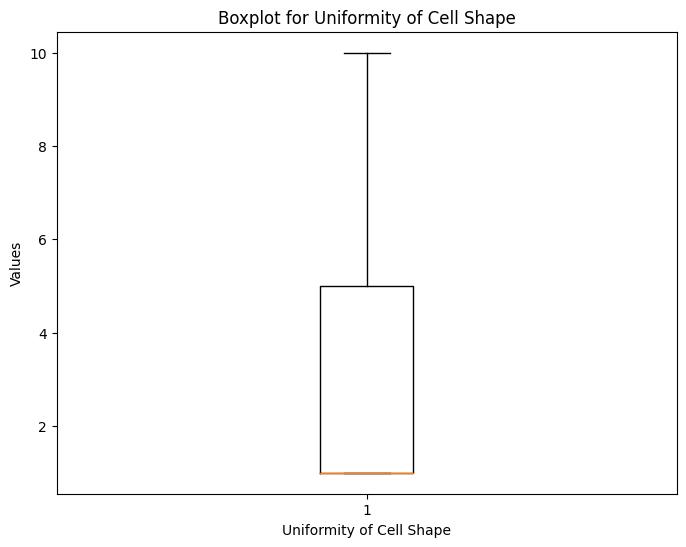

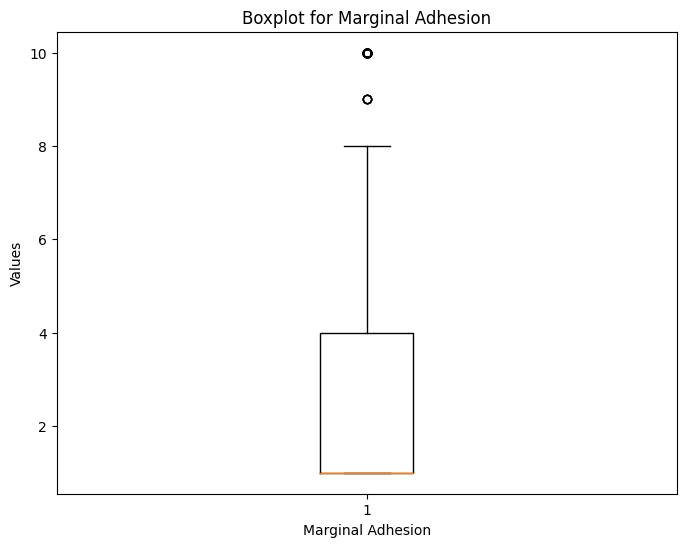

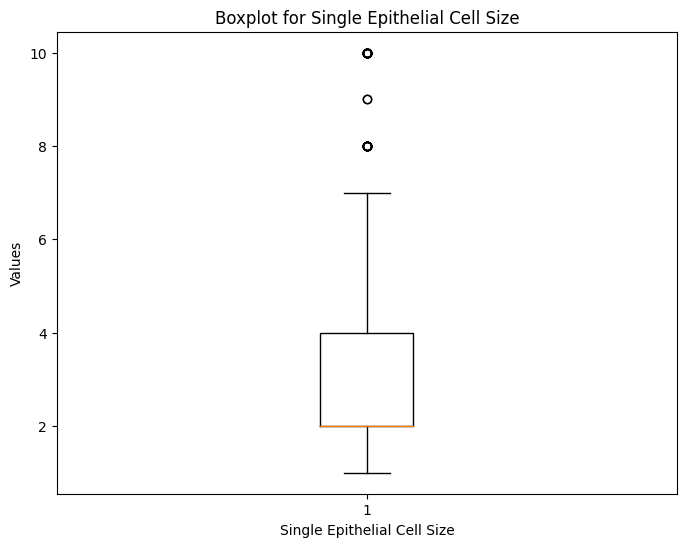

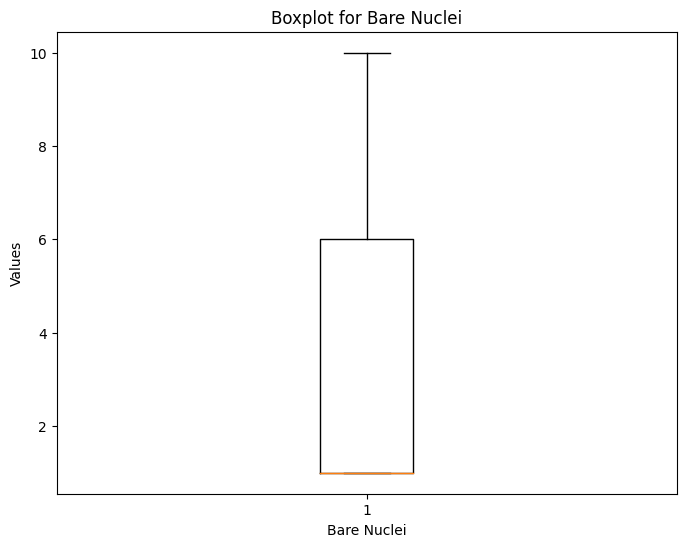

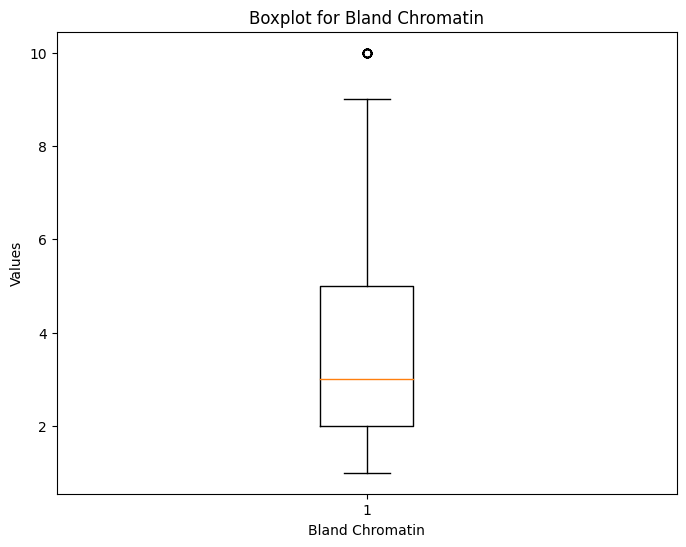

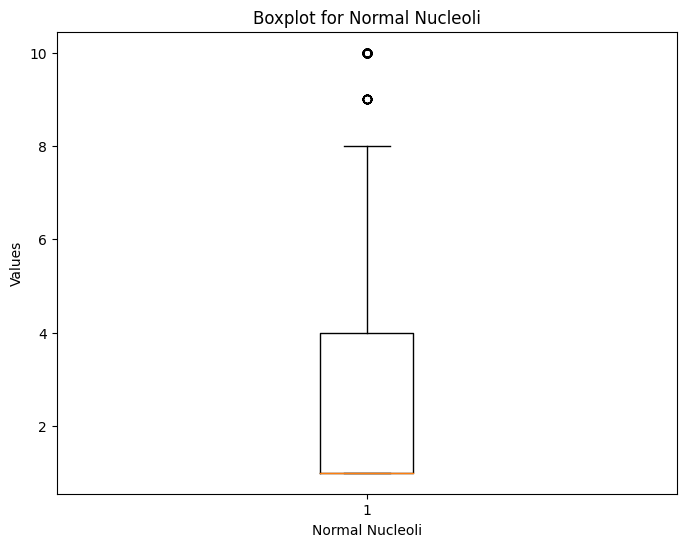

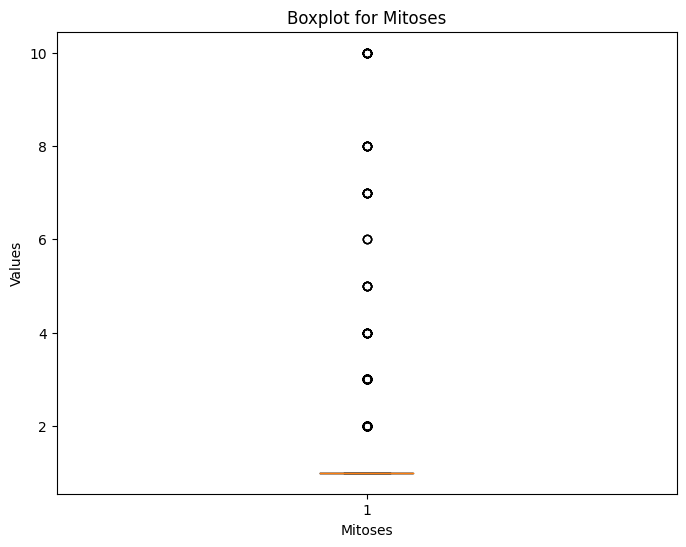

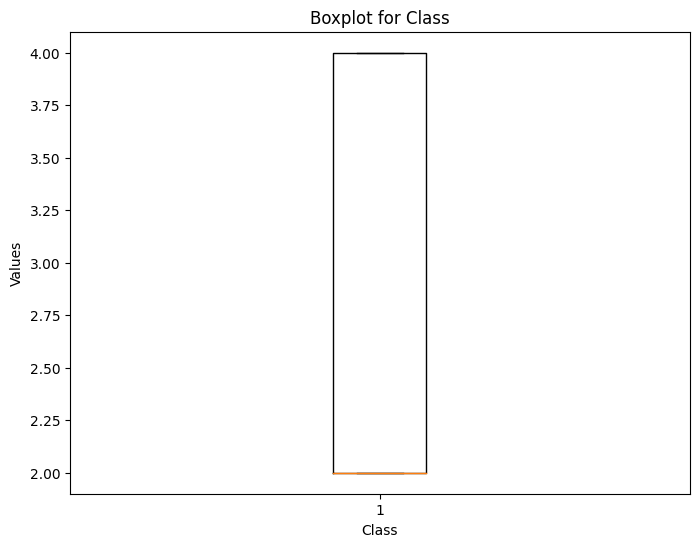

In [8]:

import matplotlib.pyplot as plt

# Check for numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

if len(numeric_columns) == 0:
    print("No numeric columns found in the dataset.")
else:
    # Create boxplots for each numeric column
    for column in numeric_columns:
        plt.figure(figsize=(8, 6))
        plt.title(f'Boxplot for {column}')
        plt.boxplot(df[column].dropna())  # Drop NA values before plotting
        plt.xlabel(column)
        plt.ylabel('Values')
        plt.show();

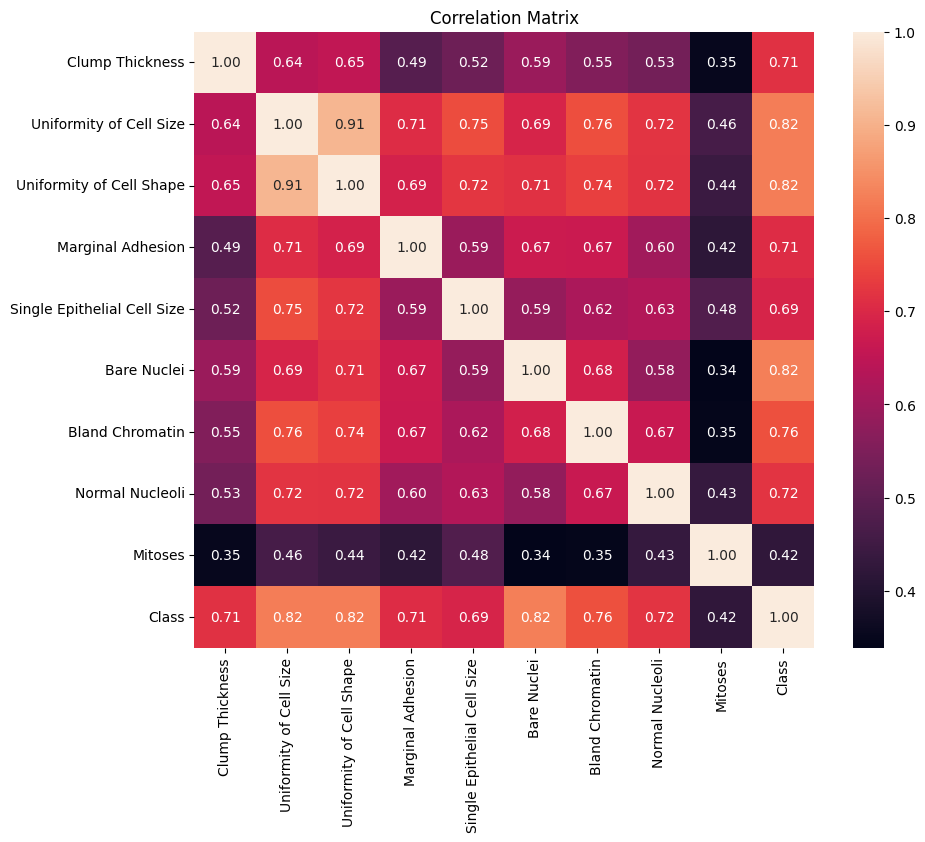

In [9]:
# Visualize the correlation matrix using a heatmap
# Compute the correlation matrix
import seaborn as sns

correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show();

In [10]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

In [11]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Print the lengths of training and testing sets
print("Training set length:", len(X_train), "\nTesting set length:", len(X_test))
print("Training labels length:", len(y_train), "\nTesting labels length:", len(y_test))

Training set length: 546 
Testing set length: 137
Training labels length: 546 
Testing labels length: 137


In [12]:
# Import LogisticRegression from scikit-learn
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

# Create an instance of LogisticRegression
model = LogisticRegression()

# Fit the model on the training data
train = model.fit(X_train, y_train)

# Make predictions on the testing data
prediction = train.predict(X_test)

In [13]:
prediction

array([4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2,
       2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 2, 2])

In [14]:
# Calculate and print the accuracy score of the model
accuracy = accuracy_score(prediction, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9562043795620438


In [ ]:
# Import LogisticRegression from scikit-learn
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression
...

# Fit the model on the training data
...

# Make predictions on the testing data
prediction = ...

# Calculate and print the accuracy score of the model
accuracy = ...(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9707317073170731


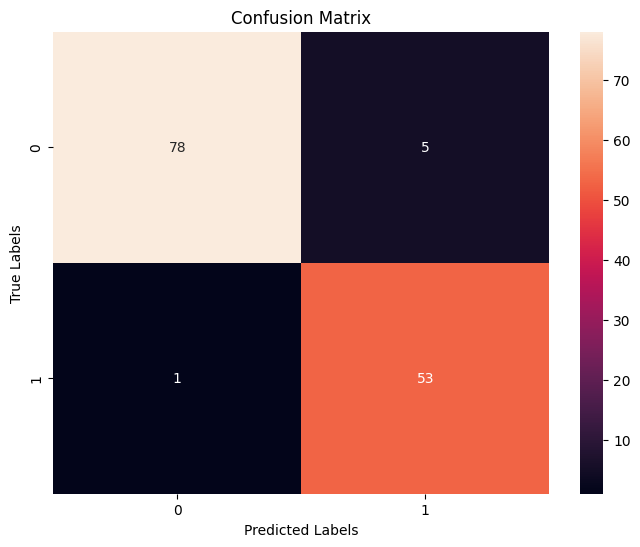

In [15]:
# Import confusion_matrix from scikit-learn
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(prediction, y_test)

# Create a heatmap of the confusion matrix
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,  fmt='d', cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[130   1]
 [  5  69]]


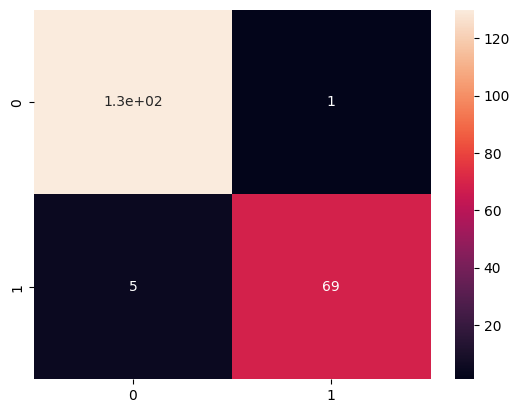

In [ ]:
# Import confusion_matrix from scikit-learn
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(prediction, y_test)

# Create a heatmap of the confusion matrix
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



In [16]:
# Import classification_report from scikit-learn
from sklearn.metrics import classification_report

# Generate the classification report
clr = classification_report(y_test, prediction)


# Print the classification report
print("Classification Report:")
print(clr)

Classification Report:
              precision    recall  f1-score   support

           2       0.94      0.99      0.96        79
           4       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137

